<a href="https://colab.research.google.com/github/Pitch2342/Rand/blob/master/Creditcard_Dataset/CreditCard_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import itertools
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn
%matplotlib inline

# Data Visualization

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/Pitch2342/Rand/master/Creditcard_Dataset/creditcard.csv')
df = pd.DataFrame(data) 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000
mean,25563.730029,-0.215998,0.049904,0.713759,0.188819,-0.230579,0.099744,-0.112945,0.042158,0.212012,-0.070782,0.422049,-0.463784,0.246243,0.237248,0.097603,-0.001688,0.150029,-0.090586,-0.032649,0.047497,-0.029867,-0.112347,-0.039741,0.007147,0.136186,0.023117,0.007920,0.004979,87.485322,0.002608
std,12634.501268,1.852734,1.590331,1.505620,1.401291,1.389342,1.310760,1.246442,1.220980,1.225436,1.125341,1.128646,1.381565,1.144976,1.133996,0.955461,0.926140,1.039761,0.855720,0.816808,0.689215,0.750467,0.637837,0.553228,0.593130,0.436324,0.504771,0.387134,0.342904,234.363900,0.051007
min,0.000000,-56.407510,-72.715728,-31.103685,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-7.175097,-14.166795,-4.049895,-17.769143,-3.808724,-19.214325,-4.152532,-12.227189,-18.587366,-8.061208,-4.932733,-13.694584,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,14885.500000,-0.967258,-0.525545,0.234005,-0.718804,-0.835861,-0.638775,-0.597343,-0.152337,-0.557966,-0.551766,-0.394026,-1.324935,-0.526065,-0.262428,-0.463257,-0.490069,-0.344658,-0.564921,-0.524152,-0.162695,-0.236681,-0.534697,-0.178539,-0.325923,-0.128094,-0.330419,-0.063233,-0.006941,7.330000,0.000000
50%,30659.000000,-0.234716,0.101338,0.817805,0.184189,-0.268034,-0.158780,-0.073240,0.048535,0.089422,-0.130308,0.394180,-0.114911,0.170429,0.197583,0.216714,0.063277,0.088800,-0.073029,-0.032202,-0.022162,-0.077114,-0.086995,-0.051560,0.060826,0.176002,-0.063462,0.008412,0.021498,23.510000,0.000000
75%,35687.500000,1.160648,0.744033,1.447562,1.070165,0.296366,0.486252,0.434200,0.315397,0.928708,0.378880,1.208745,0.490756,0.988979,0.815555,0.776789,0.557280,0.579248,0.403313,0.476123,0.169222,0.100313,0.299004,0.076971,0.399423,0.420585,0.303982,0.085200,0.076054,79.000000,0.000000
max,40000.000000,1.960497,16.713389,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,12.701538,12.018913,4.846452,4.465413,7.692209,5.784514,6.098529,9.253526,4.295648,4.555359,17.281859,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,7879.420000,1.000000


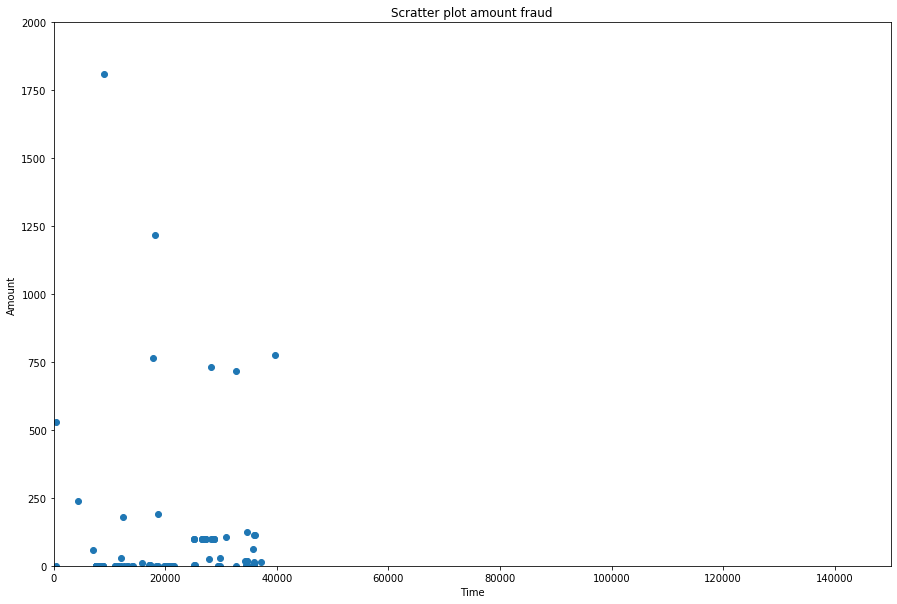

In [11]:
df_fraud = df[df['Class'] == 1] #Fraud Data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) #Fraud by time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,150000])
plt.ylim([0,2000])
plt.show()

# Observations from graph
    ==>Time does not affect frauds
    ==>Most frauds are of small amounts 

In [12]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] #frauds over 1000
print('There are only '+ str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df_fraud.shape[0]) + ' frauds')

There are only 2 frauds where the amount was bigger than 1000 over 104 frauds


# Data is unbalanced

In [13]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset.')

There are only 104 frauds in the original dataset, even though there are 39767 no frauds in the dataset.


# Unbalanced data
if data is unbalanced. It may skew classifiers. To prevent this, we create a new dataset as an equal mix of classifiers. This is called **Undersampling**

In [19]:
print("The accuracy of the classifier then would be : "+ str((39767-104)/39767)+ " which is the number of good classification over the number of tuple to classify")

The accuracy of the classifier then would be : 0.9973847662634848 which is the number of good classification over the number of tuple to classify


# Correlation of features

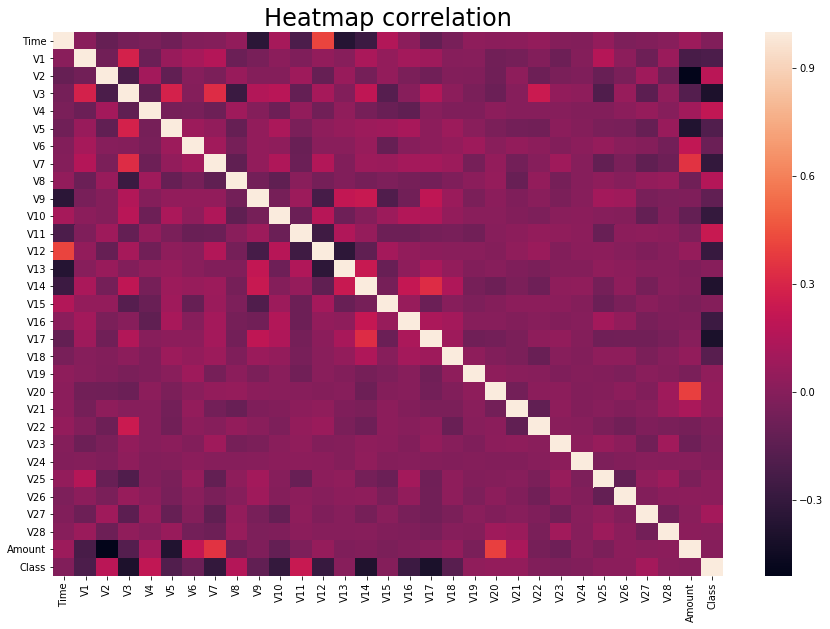

In [15]:
df_corr = df.corr() 
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr) 
seaborn.set(font_scale=2,style='white')
plt.title('Heatmap correlation')
plt.show()

In [18]:
rank = df_corr['Class'] # Retrieving the correlation coefficients per feature 
df_rank = pd.DataFrame(rank) 
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) # Ranking the absolute values of the coefficients                                     
df_rank.dropna(inplace=True) 
df_rank

,Class
Class,1.000000
V17,0.398842
V3,0.392900
V14,0.384703
V7,0.308902
V10,0.299232
V12,0.291112
V16,0.271283
V11,0.227832
V4,0.207183


# Data Selection

UNDERSAMPLING

# We seperate the data in two groups 

# Training data and Testing data

In [22]:
df_train_all = df[0:20000] # We cut in two the original dataset
df_train_1 = df_train_all[df_train_all['Class'] == 1] # We seperate the data which are the frauds and the no frauds
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have ' + str(len(df_train_1)) +" frauds so we need to take a similar number of non-fraud")

df_sample=df_train_0.sample(100)    # total of 104 frauds so we take a similar number of no frauds. We just take 100 cuz there may be less than 104 in first 20000 accounts
df_train = df_train_1.append(df_sample) # combine frauds and no frauds where it's kinda equal in number
df_train = df_train.sample(frac=1) # Then we mix our dataset

In this dataset, we have 85 frauds so we need to take a similar number of non-fraud


In [0]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # We drop the features Time and the Class 
y_train = df_train['Class'] 
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [0]:
df_test_all = df[20000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [0]:
X_train_rank = df_train[df_rank.index[1:11]] # We take the first ten ranked features
X_train_rank = np.asarray(X_train_rank)

In [0]:
X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

# Confusion Matrix

In [0]:
class_names=np.array(['0','1']) 

In [0]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Model Selection

So now, we'll use a SVM model classifier, with the scikit-learn library.

In [0]:
classifier = svm.SVC(kernel='linear') # We set a SVM classifier(Kernel = Radial Basis Function)

In [30]:
classifier.fit(X_train, y_train) # Training

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Testing the model

In [0]:
prediction_SVM_all = classifier.predict(X_test_all) #Predictions

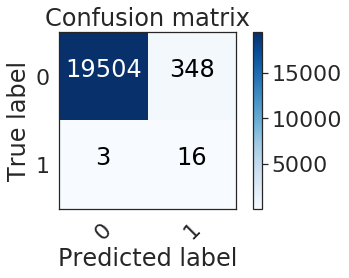

In [32]:
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In this case we are gonna try to minimize the number of errors in our prediction results. Errors are on the anti-diagonal of the confusion matrix.  But we can infer that being wrong about an actual fraud is far worse than being wrong about a non-fraud transaction. 

That is why  using the accuracy as only classification criterion could be considered unthoughtful. 
During the remaining part of this study our criterion will consider precision on the real fraud 4 times more important than the general accuracy.
Even though the final tested result is accuracy.

In [33]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.8701514240535666


In [34]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 16 frauds / 19 total frauds.

So, the probability to detect a fraud is 0.8421052631578947
the accuracy is : 0.9823360676362538


 # Models Rank

There is a need to compute the fit method again, as the dimension of the tuples to predict went from 29 to 10 because of the dimension reduction

In [0]:
classifier.fit(X_train_rank, y_train) 
prediction_SVM = classifier.predict(X_test_all_rank) 

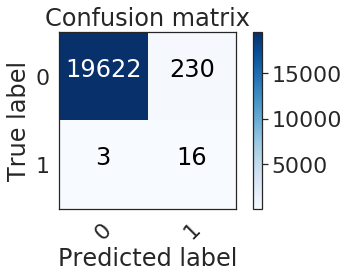

In [36]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [37]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.8713390844632087


In [38]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 16 frauds / 19 total frauds.

So, the probability to detect a fraud is 0.8421052631578947
the accuracy is : 0.9882743696844648


We can see that the study using the reduced data is far from unrelevant, which means that the last step of the previously computed PCA could have been done in a more efficient way. Indeed one of the main question we have with the PCA once we calculated the principals components direction, is how many of this component are we gonna keep. This means that some of the 30 dimensions are do not discriminate classes that much.

# Re-balanced class weigh :

In this previously used SVM model, the weight of each class was the same, which means that missing a fraud is as bad as misjudging a non-fraud. The objective, for a bank, is to maximize the number of detected frauds! Even if it means considering more non-fraud tuple as fraudulent operation. So, we need to minimize the False positives : the number of no detected frauds.

Indeed, by modifying the class_weight parameter, we can chose which class to give more importance during the training phase. In this case, the class_1 which describes the fraudulent operations will be considered more important than the class_0 (non-fraud operation). However, in this case we will give more importance to the class_0 due to the large number of misclassed non-fraud operation. Of course the goal is to lose as little effective fraud as possible in the process.


In [0]:
classifier_b = svm.SVC(kernel='linear',class_weight={0:0.60, 1:0.40})

In [40]:
classifier_b.fit(X_train, y_train) # Then we train our model, with our balanced data train.

SVC(C=1.0, cache_size=200, class_weight={0: 0.6, 1: 0.4}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Testing the model

In [0]:
prediction_SVM_b_all = classifier_b.predict(X_test_all) #We predict all the data set.

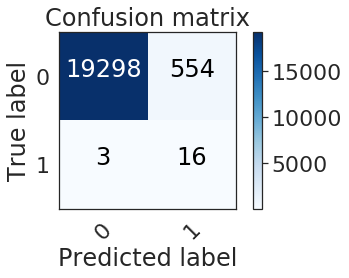

In [42]:
cm = confusion_matrix(y_test_all, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

In [43]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.8680780507960556


In [44]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 16 frauds / 19 total frauds.

So, the probability to detect a fraud is 0.8421052631578947
the accuracy is : 0.9719692013486991


 # Models Rank

In [0]:
classifier_b.fit(X_train_rank, y_train) # Then we train our model, with our balanced data train.
prediction_SVM = classifier_b.predict(X_test_all_rank) #And finally, we predict our data test.

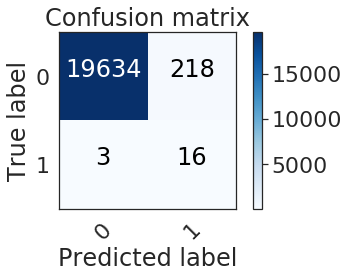

In [46]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [47]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.871459863487918


In [48]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 16 frauds / 19 total frauds.

So, the probability to detect a fraud is 0.8421052631578947
the accuracy is : 0.9888782648080117
